dataset: https://www.kaggle.com/ashaheedq/video-games-sales-2019?select=vgsales-12-4-2019.csv

In [62]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [63]:
vgames=pd.read_csv('./resources/vgames_clean.csv').drop('Unnamed: 0', axis=1)
vgames.head()

,game,Genre,ESRB_Rating,Platform,Publisher,Critic_Score,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,grand-theft-auto-v,Action,M,PS3,Rockstar Games,9.4,20.32,6.37,9.85,0.99,3.12,2013.0
1,grand-theft-auto-v,Action,M,PS4,Rockstar Games,9.7,19.39,6.06,9.71,0.60,3.02,2014.0
2,grand-theft-auto-vice-city,Action,M,PS2,Rockstar Games,9.6,16.15,8.41,5.49,0.47,1.78,2002.0
3,call-of-duty-modern-warfare-3,Shooter,M,X360,Activision,8.7,14.82,9.07,4.29,0.13,1.33,2011.0
4,call-of-duty-black-ops,Shooter,M,X360,Activision,8.8,14.74,9.76,3.73,0.11,1.14,2010.0


In [64]:
games = vgames.game
vgames = vgames.drop('game', axis =1)
vgames = pd.get_dummies(vgames)
vgames

,Critic_Score,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Genre_Action,Genre_Action-Adventure,Genre_Adventure,Genre_Board Game,Genre_Fighting,Genre_MMO,Genre_Misc,Genre_Music,Genre_Party,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Sandbox,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,ESRB_Rating_E,ESRB_Rating_E10,ESRB_Rating_M,ESRB_Rating_T,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GBC,Platform_GC,Platform_N64,Platform_NS,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSN,Platform_PSP,Platform_PSV,Platform_SAT,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Publisher_2K Games,Publisher_2K Sports,Publisher_505 Games,Publisher_989 Studios,Publisher_AQ Interactive,Publisher_ASCII Entertainment,Publisher_Acclaim Entertainment,Publisher_Activision,Publisher_Agetec,Publisher_Aksys Games,Publisher_Arc System Works,Publisher_Atari,Publisher_Atlus,Publisher_Bandai,Publisher_Bandai Namco Entertainment,Publisher_Bandai Namco Games,Publisher_Bethesda Softworks,Publisher_Blizzard Entertainment,Publisher_CDV Software Entertainment,Publisher_Capcom,Publisher_City Interactive,Publisher_Codemasters,Publisher_D3 Publisher,Publisher_Deep Silver,Publisher_Disney Interactive Studios,Publisher_EA Sports,Publisher_Eidos Interactive,Publisher_Electronic Arts,Publisher_Enix,Publisher_GT Interactive,Publisher_Global Star Software,Publisher_Hello Games,Publisher_Hudson Soft,Publisher_Ignition Entertainment,Publisher_JoWood Productions,Publisher_KOEI,Publisher_Kalypso,Publisher_Koei Tecmo,Publisher_Konami,Publisher_Konami Digital Entertainment,Publisher_LucasArts,Publisher_Majesco,Publisher_Marvelous Interactive,Publisher_Maxis,Publisher_Microids,Publisher_Microsoft,Publisher_Microsoft Game Studios,Publisher_Microsoft Studios,Publisher_Midway Games,Publisher_Mojang,Publisher_NIS America,Publisher_Namco,Publisher_Namco Bandai,Publisher_Namco Bandai Games,Publisher_Natsume,Publisher_Nintendo,Publisher_Nippon Ichi Software,Publisher_Ocean,Publisher_RedOctane,Publisher_Rockstar Games,Publisher_Sega,Publisher_Sony Computer Entertainment,Publisher_Sony Computer Entertainment America,Publisher_Sony Interactive Entertainment,Publisher_Sony Online Entertainment,Publisher_SouthPeak Interactive,Publisher_Square,Publisher_Square EA,Publisher_Square Enix,Publisher_THQ,Publisher_Taito,Publisher_Take-Two Interactive,Publisher_Tecmo,Publisher_Tecmo Koei,Publisher_Touchstone,Publisher_Ubisoft,Publisher_Universal Interactive,Publisher_Valve,Publisher_Valve Corporation,Publisher_Warner Bros. Interactive,Publisher_Warner Bros. Interactive Entertainment,Publisher_Working Designs,Publisher_Xseed Games
0,9.4,20.32,6.37,9.85,0.99,3.12,2013.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9.7,19.39,6.06,9.71,0.60,3.02,2014.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9.6,16.15,8.41,5.49,0.47,1.78,2002.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,8.7,14.82,9.07,4.29,0.13,1.33,2011.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8.8,14.74,9.76,3.73,0.11,1.14,2010.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [65]:
vgames['game'] = games

In [66]:
first_column = vgames.pop('game')

vgames.insert(0, 'game', first_column)

In [67]:
# drop duplicate titles from game list

vgames2 = vgames.drop_duplicates(subset ="game").reset_index().drop('index', axis=1)
print(vgames[vgames['game'] == 'grand-theft-auto-v']['game'].count())
print(vgames2[vgames2['game'] == 'grand-theft-auto-v']['game'].count())

3
1


In [68]:
def get_recommended(df, game, n_neighbors=10):
    
    #add filters here 
    
    df_sub = df.drop(["game"], axis=1)
    model_knn = NearestNeighbors(metric='jaccard', n_neighbors=n_neighbors)
    model_knn.fit(df_sub)
    
    game_row = df.loc[df["game"] == game].head(1)
    gr = df.loc[df["game"] == game].head(1) # for index value of game
    game_row = game_row.drop(["game"], axis=1)
    game_row = game_row.to_numpy()
    
    distances, indices = model_knn.kneighbors(game_row, n_neighbors = n_neighbors)
    gri = np.where(indices == gr.index)[1] # variable to hold game's index value in indices
    indices = indices[indices != gr.index] # drops input game if it is in indices array
    result = df.iloc[indices.flatten()]
    distances = np.delete(distances, gri) # drops input game from distances array
    result["Distance"] = distances
    
    return result

In [74]:
recom_result = get_recommended(vgames2,'halo-reach')
recom_result

C:\Users\Mastermind\anaconda3\envs\PyEnv\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\Mastermind\anaconda3\envs\PyEnv\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,game,Critic_Score,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Genre_Action,Genre_Action-Adventure,Genre_Adventure,Genre_Board Game,Genre_Fighting,Genre_MMO,Genre_Misc,Genre_Music,Genre_Party,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Sandbox,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,ESRB_Rating_E,ESRB_Rating_E10,ESRB_Rating_M,ESRB_Rating_T,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GBC,Platform_GC,Platform_N64,Platform_NS,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSN,Platform_PSP,Platform_PSV,Platform_SAT,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Publisher_2K Games,Publisher_2K Sports,Publisher_505 Games,Publisher_989 Studios,Publisher_AQ Interactive,Publisher_ASCII Entertainment,Publisher_Acclaim Entertainment,Publisher_Activision,Publisher_Agetec,Publisher_Aksys Games,Publisher_Arc System Works,Publisher_Atari,Publisher_Atlus,Publisher_Bandai,Publisher_Bandai Namco Entertainment,Publisher_Bandai Namco Games,Publisher_Bethesda Softworks,Publisher_Blizzard Entertainment,Publisher_CDV Software Entertainment,Publisher_Capcom,Publisher_City Interactive,Publisher_Codemasters,Publisher_D3 Publisher,Publisher_Deep Silver,Publisher_Disney Interactive Studios,Publisher_EA Sports,Publisher_Eidos Interactive,Publisher_Electronic Arts,Publisher_Enix,Publisher_GT Interactive,Publisher_Global Star Software,Publisher_Hello Games,Publisher_Hudson Soft,Publisher_Ignition Entertainment,Publisher_JoWood Productions,Publisher_KOEI,Publisher_Kalypso,Publisher_Koei Tecmo,Publisher_Konami,Publisher_Konami Digital Entertainment,Publisher_LucasArts,Publisher_Majesco,Publisher_Marvelous Interactive,Publisher_Maxis,Publisher_Microids,Publisher_Microsoft,Publisher_Microsoft Game Studios,Publisher_Microsoft Studios,Publisher_Midway Games,Publisher_Mojang,Publisher_NIS America,Publisher_Namco,Publisher_Namco Bandai,Publisher_Namco Bandai Games,Publisher_Natsume,Publisher_Nintendo,Publisher_Nippon Ichi Software,Publisher_Ocean,Publisher_RedOctane,Publisher_Rockstar Games,Publisher_Sega,Publisher_Sony Computer Entertainment,Publisher_Sony Computer Entertainment America,Publisher_Sony Interactive Entertainment,Publisher_Sony Online Entertainment,Publisher_SouthPeak Interactive,Publisher_Square,Publisher_Square EA,Publisher_Square Enix,Publisher_THQ,Publisher_Taito,Publisher_Take-Two Interactive,Publisher_Tecmo,Publisher_Tecmo Koei,Publisher_Touchstone,Publisher_Ubisoft,Publisher_Universal Interactive,Publisher_Valve,Publisher_Valve Corporation,Publisher_Warner Bros. Interactive,Publisher_Warner Bros. Interactive Entertainment,Publisher_Working Designs,Publisher_Xseed Games,Distance
31,halo-3-odst,8.7,6.35,4.34,1.34,0.06,0.61,2009.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000
250,crackdown,8.4,1.75,1.00,0.53,0.03,0.18,2007.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000
472,perfect-dark-zero,8.1,0.77,0.66,0.02,0.03,0.06,2005.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000
342,crackdown-2,7.5,1.12,0.63,0.36,0.02,0.10,2010.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000
1005,bullet-wi

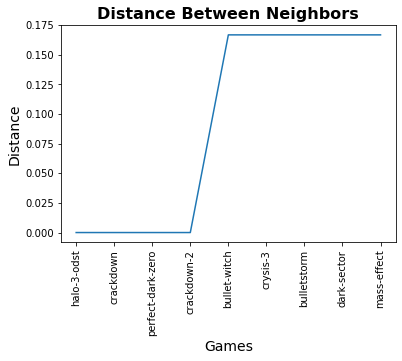

In [75]:
plt.plot(recom_result["game"], recom_result["Distance"])
plt.title("Distance Between Neighbors", fontsize=16, fontweight="bold")
plt.xlabel("Games", fontsize=14)
plt.xticks(rotation = 90)
plt.ylabel("Distance", fontsize=14)
plt.show()

In [76]:
for game in vgames.game:
    print(game)

grand-theft-auto-v
grand-theft-auto-v
grand-theft-auto-vice-city
call-of-duty-modern-warfare-3
call-of-duty-black-ops
red-dead-redemption-2
call-of-duty-modern-warfare-2
call-of-duty-wwii
call-of-duty-modern-warfare-3
grand-theft-auto-iii
call-of-duty-black-ops
fifa-18
grand-theft-auto-iv
fifa-17
call-of-duty-modern-warfare-2
grand-theft-auto-iv
call-of-duty-ghosts
call-of-duty-ghosts
halo-reach
call-of-duty-4-modern-warfare
the-elder-scrolls-v-skyrim
grand-theft-auto-v
fallout-4
fifa-16
star-wars-battlefront-2015
grand-theft-auto-liberty-city-stories
crash-bandicoot-2-cortex-strikes-back
call-of-duty-advanced-warfare
battlefield-3
battlefield-3
need-for-speed-underground
crash-bandicoot-3-warped
need-for-speed-underground-2
uncharted-3-drakes-deception
medal-of-honor-frontline
uncharted-2-among-thieves
call-of-duty-4-modern-warfare
fifa-soccer-12
red-dead-redemption
assassins-creed-iii
red-dead-redemption
the-elder-scrolls-v-skyrim
halo-3-odst
minecraft
fifa-15
the-last-of-us
driver
g